<a href="https://colab.research.google.com/github/ShivamKailkhura/Machine-Learning-Models/blob/main/StockPricePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
####Install the dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.style.use('bmh')

In [2]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving Download Data - STOCK_US_XNAS_NFLX (1).csv to Download Data - STOCK_US_XNAS_NFLX (1).csv


In [4]:
#Store the data into a data frame
df=pd.read_csv('Download Data - STOCK_US_XNAS_NFLX (1).csv')
#Top 6 rows of data
df.head(6)

,Date,Open,High,Low,Close,Volume
0,02/28/2022,387.33,397.75,382.13,394.52,"5,008,250"
1,02/25/2022,386.61,391.29,375.58,390.80,"4,841,636"
2,02/24/2022,355.09,390.73,354.72,390.03,"7,068,724"
3,02/23/2022,382.72,386.00,366.66,367.46,"4,614,290"
4,02/22/2022,388.95,392.42,373.02,377.38,"6,697,515"
5,02/18/2022,392.53,402.87,389.05,391.29,"6,801,668"


In [5]:
#Get the number of trading days
df.shape

(253, 6)

In [6]:
df.size

1518

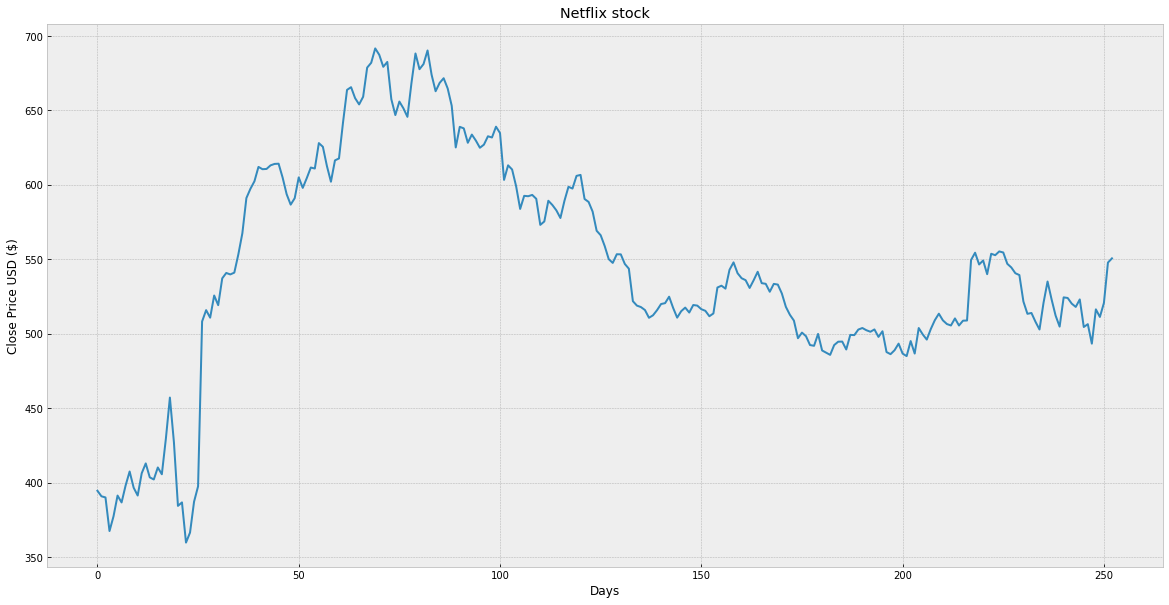

In [7]:
#visualize the close price data
plt.figure(figsize=(20,10))
plt.title('Netflix stock')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()


In [8]:
#create a different database
sf=df[['Close']]
sf.head(4) 

,Close
0,394.52
1,390.80
2,390.03
3,367.46


In [9]:
#create variable to predict 'x' days out into future
future_days = 25
#create a new column (target) shifted 'x' units/days up
sf['Prediction']=sf[['Close']].shift(-future_days)
sf.tail(25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,Prediction
228,540.67,NaN
229,539.42,NaN
230,521.66,NaN
231,513.39,NaN
232,513.95,NaN
233,508.05,NaN
234,502.86,NaN
235,520.81,NaN
236,535.09,NaN
237,523.11,NaN


In [10]:
#Create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(sf.drop(['Prediction'],1))[:-future_days]
#Alternative is 'X = np.array(sf['Close'])[:-future_days]
print(X)
X.shape

[[394.52]
 [390.8 ]
 [390.03]
 [367.46]
 [377.38]
 [391.29]
 [386.67]
 [398.08]
 [407.46]
 [396.57]
 [391.31]
 [406.27]
 [412.89]
 [403.53]
 [402.1 ]
 [410.17]
 [405.6 ]
 [429.48]
 [457.13]
 [427.14]
 [384.36]
 [386.7 ]
 [359.7 ]
 [366.42]
 [387.15]
 [397.5 ]
 [508.25]
 [515.86]
 [510.8 ]
 [525.69]
 [519.2 ]
 [537.22]
 [540.84]
 [539.85]
 [541.06]
 [553.29]
 [567.52]
 [591.15]
 [597.37]
 [602.44]
 [612.09]
 [610.54]
 [610.71]
 [613.12]
 [614.09]
 [614.24]
 [604.92]
 [593.74]
 [586.73]
 [591.06]
 [605.04]
 [597.99]
 [604.56]
 [611.66]
 [611.  ]
 [628.08]
 [625.58]
 [612.69]
 [602.13]
 [616.47]
 [617.77]
 [641.9 ]
 [663.84]
 [665.64]
 [658.29]
 [654.06]
 [659.2 ]
 [678.8 ]
 [682.02]
 [691.69]
 [687.4 ]
 [679.33]
 [682.61]
 [657.58]
 [646.91]
 [655.99]
 [651.45]
 [645.72]
 [668.4 ]
 [688.29]
 [677.72]
 [681.17]
 [690.31]
 [674.05]
 [662.92]
 [668.52]
 [671.66]
 [664.78]
 [653.16]
 [625.14]
 [639.  ]
 [637.97]
 [628.29]
 [633.8 ]
 [629.76]
 [624.94]
 [627.04]
 [632.66]
 [631.85]
 [639.1 ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


(228, 1)

In [11]:
#Create the target data set(y) and convert it to a numpy array and get all of the target values except the last few rows
y=np.array(sf['Prediction'])[:-future_days]
print(y)
y.shape

[397.5  508.25 515.86 510.8  525.69 519.2  537.22 540.84 539.85 541.06
 553.29 567.52 591.15 597.37 602.44 612.09 610.54 610.71 613.12 614.09
 614.24 604.92 593.74 586.73 591.06 605.04 597.99 604.56 611.66 611.
 628.08 625.58 612.69 602.13 616.47 617.77 641.9  663.84 665.64 658.29
 654.06 659.2  678.8  682.02 691.69 687.4  679.33 682.61 657.58 646.91
 655.99 651.45 645.72 668.4  688.29 677.72 681.17 690.31 674.05 662.92
 668.52 671.66 664.78 653.16 625.14 639.   637.97 628.29 633.8  629.76
 624.94 627.04 632.66 631.85 639.1  634.81 603.35 613.15 610.34 599.06
 583.85 592.64 592.39 593.26 590.65 573.14 575.43 589.35 586.5  582.87
 577.76 589.29 598.72 597.54 606.05 606.71 590.53 588.55 582.07 569.19
 566.18 558.92 550.12 547.58 553.41 553.33 546.88 543.71 521.87 518.91
 517.92 515.92 510.72 512.4  515.84 519.97 520.55 524.89 517.35 510.82
 515.15 517.57 514.25 519.3  518.91 516.49 515.41 511.77 513.63 531.05
 532.28 530.31 542.95 547.95 540.68 537.31 535.98 530.76 535.96 541.64
 533.98 

(228,)

In [12]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [13]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train,y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train,y_train)

In [14]:
#Get the last 'x' rows of the feature data set
x_future = sf.drop(['Prediction'],1)[:-(future_days)]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
print(x_future)

[[486.69]
 [503.84]
 [499.55]
 [496.08]
 [503.18]
 [509.11]
 [513.47]
 [509.  ]
 [506.52]
 [505.55]
 [510.3 ]
 [505.55]
 [508.78]
 [508.9 ]
 [549.57]
 [554.44]
 [546.54]
 [549.22]
 [540.02]
 [553.73]
 [552.78]
 [555.31]
 [554.58]
 [546.99]
 [544.53]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [15]:
#show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction 
lr_prediction = lr.predict(x_future)
print(lr_prediction)
print()

[540.67 539.42 521.66 513.39 554.44 524.03 502.86 524.03 513.95 513.95
 530.76 513.95 524.44 524.03 504.54 518.02 523.06 504.54 506.44 493.33
 516.39 511.29 520.7  547.82 550.64]

[541.67161979 547.59260979 546.11149917 544.91349128 547.36474661
 549.41206269 550.91734061 549.37408549 548.51787236 548.18298255
 549.82290689 548.18298255 549.2981311  549.33956077 563.3807656
 565.06211961 562.3346665  563.25992907 560.08365456 564.81699408
 564.48900921 565.3624847  565.11045422 562.49002775 561.64071957]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


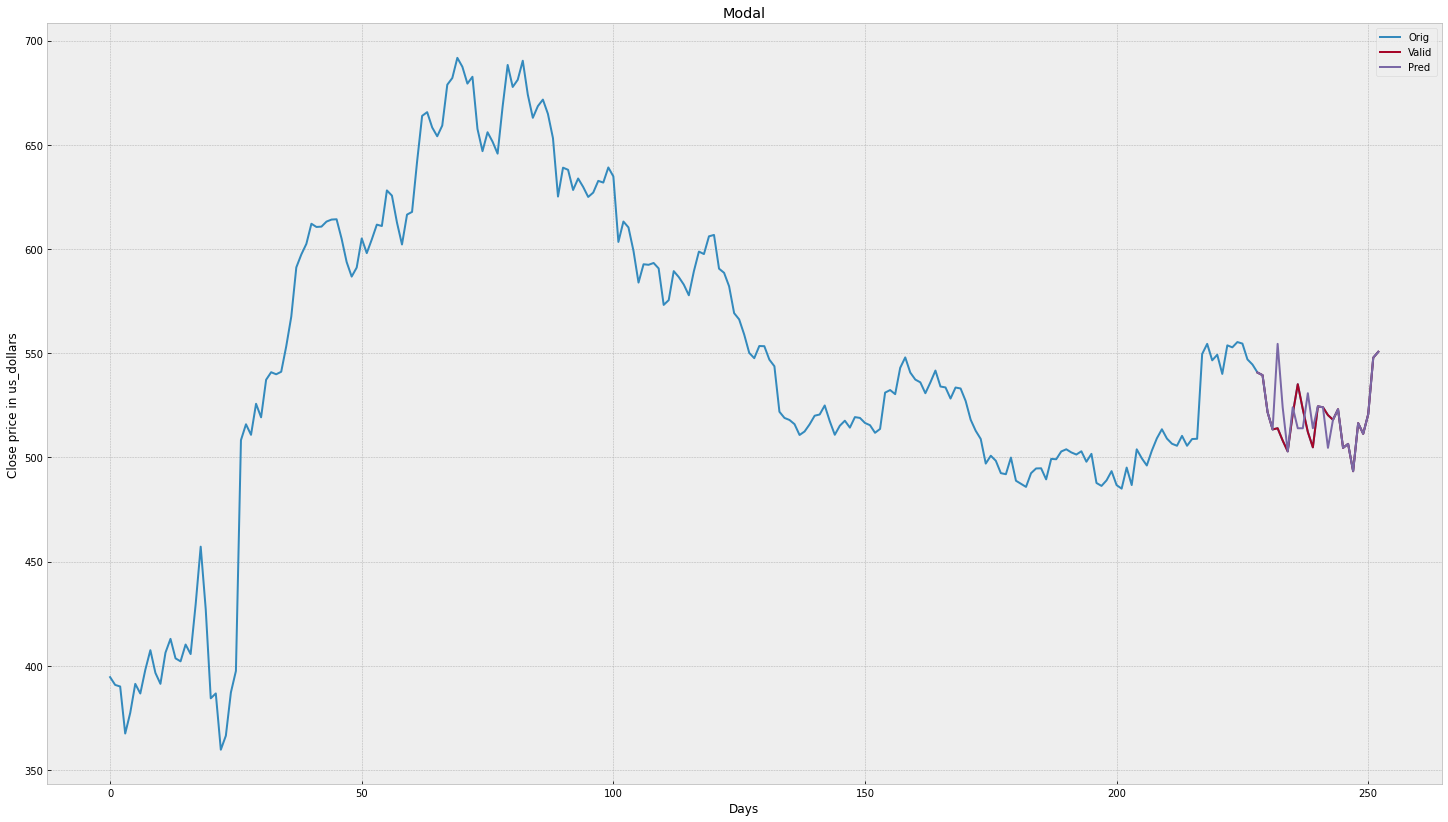

In [21]:
#visualize the data
predictions = tree_prediction
valid = sf[X.shape[0]:]
#here valid indicates dataset where we need X.shape[0] rows but all columns from sf dataset.  
valid['Predictions']=predictions
#we're creating a column Predictions in valid to store values of predictions 
plt.figure(figsize=(25,14))
plt.title('Modal')
plt.xlabel('Days')
plt.ylabel('Close price in us_dollars')
plt.plot(sf['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Valid','Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


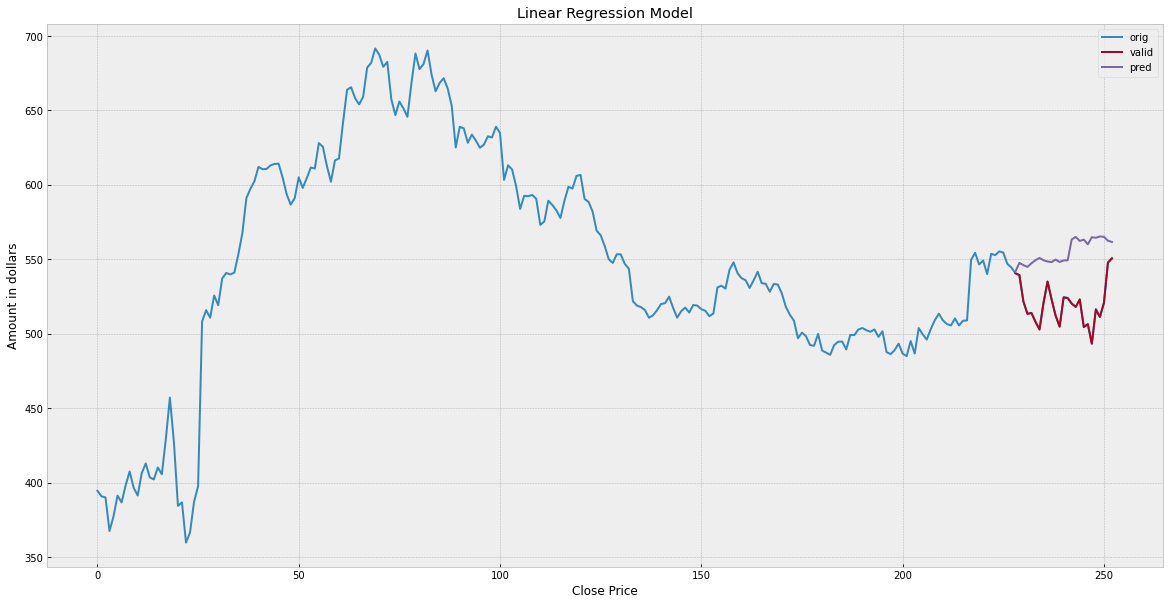

In [28]:
#Predict the values using LinearRegression
predictions2 = lr_prediction
valid=sf[X.shape[0]:]
valid['Predictions']=predictions2
plt.figure(figsize=(20,10))
plt.plot(sf['Close'])
plt.plot(valid[['Close','Predictions']])
plt.title('Linear Regression Model')
plt.xlabel('Close Price')
plt.ylabel('Amount in dollars')
plt.legend(['orig','valid','pred'])